# ANÁLISIS COVID19 EN ARGENTINA.

* Comienzo importando las librerias.
   * Pandas, matplotlib y seaborn.
* Luego cargo las bases de datos de donde tomaré la información.
  * df_covid = contagiados, testeados y fallecidos desde que se detecto el primer caso en Argentina (Detallado por provincia).
  * df_censo = cantidad de habitantes por provincia, según el censo realizado en el año 2010.

# FUENTE: 

  * df_covid https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0
  * df_censo https://es.wikipedia.org/wiki/Censo_argentino_de_2010

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
url = 'https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0'
df_covid = pd.read_csv(url)

In [4]:
tables = pd.read_html('https://es.wikipedia.org/wiki/Censo_argentino_de_2010',thousands='.', decimal=',')

In [5]:
df_censo = tables[0]

In [6]:
df_censo.head()

,Provincia,PoblaciónCenso 2001,PoblaciónCenso 2010,Crec. intercensal %(2001 - 2010),Tasa de crecimiento medio anual por mil (2001 - 2010)[9]​
0,Provincia de Buenos Aires,13.827.203 [10]​,15.625.083[11]​,13.0,13.8
1,Córdoba,3066801,3308876,7.9,8.5
2,Santa Fe,3000701,3194537,6.5,7.0
3,Ciudad Autónoma de Buenos Aires,2776138,2890151,4.1,4.5
4,Mendoza,1579651,1738929,10.1,10.8


# df_censo

* Una vez realizada la carga, muestro el dataframe. Así verifico que la carga se haya realizado correctamente
* Me voy a concentrar en las columnas: provincia y PoblaciónCenso 2010.
* Se puede ver que en la primera fila, columna: PoblaciónCenso 2010 se encuentra un tipo de dato que no es entero ni flotante, el cual me va a imposibilitar trabajar con esa fila de igual forma que con las demás.
* Por lo tanto, voy concentrarme en esa posición de la tabla, analizarla, quitar los caracteres que no corresponden al número real y convertirlo a tipo entero.

In [7]:
df_censo.at[0,'PoblaciónCenso 2010']

'15.625.083[11]\u200b'

In [8]:
df_censo.at[0,'PoblaciónCenso 2010'][0:10]

'15.625.083'

In [9]:
df_censo.at[0,'PoblaciónCenso 2010'][0:10].replace('.','')

'15625083'

In [10]:
df_censo.at[0,'PoblaciónCenso 2010']=df_censo.at[0,'PoblaciónCenso 2010'][0:10].replace('.','')

In [11]:
df_censo.at[0,'PoblaciónCenso 2010']

'15625083'

In [12]:
df_censo['PoblaciónCenso 2010'] = df_censo['PoblaciónCenso 2010'].astype('int')

In [13]:
df_censo = df_censo[['Provincia','PoblaciónCenso 2010']]

In [14]:
df_censo = df_censo.rename(columns={'Provincia':'provincia','PoblaciónCenso 2010':'poblaciónCenso 2010'})

# df_covid

* Muestro el dataframe y verifico que la carga se haya realizado correctamente.
* Elimino las columnas que no aportan datos al analisis que voy a realizar. A algunas de las columnas que me sirven les cambio el nombre para identificarlas mejor.
* Posteriormente reemplazo los valores nulos de la columna: total_recuperados por el valor anterior más cercano que no sea nulo.
* Vuelvo a mostrar el dataframe para corroborar que los cambios se hayan realizado correctamente.

In [15]:
df_covid.head()

,fecha,dia_inicio,dia_cuarentena_dnu260,osm_admin_level_2,osm_admin_level_4,osm_admin_level_8,tot_casosconf,nue_casosconf_diff,tot_fallecidos,nue_fallecidos_diff,tot_recuperados,tot_terapia,test_RT-PCR_negativos,test_RT-PCR_total,transmision_tipo,informe_tipo,informe_link,observacion,covid19argentina_admin_level_4
0,2/03/2020,1,NaN,Argentina,CABA,NaN,1,1.0,0,0,NaN,NaN,NaN,NaN,importado,NaN,https://www.infobae.com/coronavirus/2020/03/03...,no hay informe,capital-federal
1,3/03/2020,2,NaN,Argentina,Indeterminado,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,importado,NaN,NaN,no hay informe,no-data
2,4/03/2020,3,NaN,Argentina,Indeterminado,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,importado,NaN,NaN,no hay informe,no-data
3,5/03/2020,4,NaN,Argentina,Buenos Aires,NaN,2,1.0,2,2,NaN,NaN,NaN,NaN,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,NaN,buenos-aires
4,6/03/2020,5,NaN,Argentina,Indeterminado,NaN,2,0.0,2,0,NaN,NaN,NaN,NaN,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,NaN,no-data


In [16]:
df_covid = df_covid.iloc[:,:14]

In [17]:
df_covid = df_covid.drop(df_covid.columns[[5]],axis="columns")

In [18]:
df_covid = df_covid.rename(columns={"osm_admin_level_2":"pais","osm_admin_level_4":"provincia","tot_casosconf":"total_confirmados","nue_casosconf_diff":"nuevos_confirmados","tot_fallecidos":"total_fallecidos","nue_fallecidos_diff":"nuevos_fallecidos","tot_recuperados":"total_recuperados","test_RT-PCR_negativos":"total_test_negativos","test_RT-PCR_total":"total_test"})

In [19]:
df_covid['total_recuperados'] = df_covid['total_recuperados'].fillna(method='ffill')

In [20]:
df_covid.head()

,fecha,dia_inicio,dia_cuarentena_dnu260,pais,provincia,total_confirmados,nuevos_confirmados,total_fallecidos,nuevos_fallecidos,total_recuperados,tot_terapia,total_test_negativos,total_test
0,2/03/2020,1,NaN,Argentina,CABA,1,1.0,0,0,NaN,NaN,NaN,NaN
1,3/03/2020,2,NaN,Argentina,Indeterminado,1,0.0,0,0,NaN,NaN,NaN,NaN
2,4/03/2020,3,NaN,Argentina,Indeterminado,1,0.0,0,0,NaN,NaN,NaN,NaN
3,5/03/2020,4,NaN,Argentina,Buenos Aires,2,1.0,2,2,NaN,NaN,NaN,NaN
4,6/03/2020,5,NaN,Argentina,Indeterminado,2,0.0,2,0,NaN,NaN,NaN,NaN


In [21]:
plt.rcParams['figure.figsize']=(15,5)

# Casos confirmados y fallecidos por día

* Creo un dataframe que llamo suma, donde voy a agrupar y sumar los casos confirmados por día y los fallecidos por día.
* Muestro las primeras 5 filas para verificar que se haya creado correctamente.
* Utilizando la libreria matplotlib realizo un gráfico donde se observa en el eje X los dias, desde el dia 1 hasta el dia actual y en el eje Y las cantidades. En el caso de la linea azul se ve la cantidad de casos confirmados diariamente y con la linea roja, la cantidad de fallecidos diariamente.
* Se puede ver que, al tener cantidades tan dispares entre de casos confirmados y fallecidos no se llega a distinguir en detalle la cantidad de faccidos por día.
* Utilizando nuevamente la libreria matplotlib, se muestran dos graficas para poder apreciar los datos en detalle. En la primera se muestra la cantidad de casos confirmados por dia, y en la segunda, la cantidad de fallecidos por día.

In [22]:
suma = df_covid.groupby(["dia_inicio"])['nuevos_fallecidos','nuevos_confirmados'].sum().reset_index()

In [23]:
suma.head()

,dia_inicio,nuevos_fallecidos,nuevos_confirmados
0,1,0,1.0
1,2,0,0.0
2,3,0,0.0
3,4,2,1.0
4,5,0,0.0


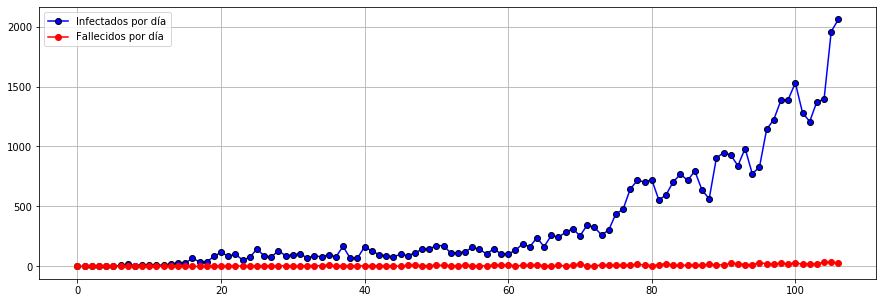

In [24]:
plt.plot(suma['nuevos_confirmados'], color="blue", label="Infectados por día",marker="o",markeredgecolor="black")
plt.plot(suma['nuevos_fallecidos'], color="red",label="Fallecidos por día",marker="o")
plt.grid()
plt.legend(loc=2)
plt.show()

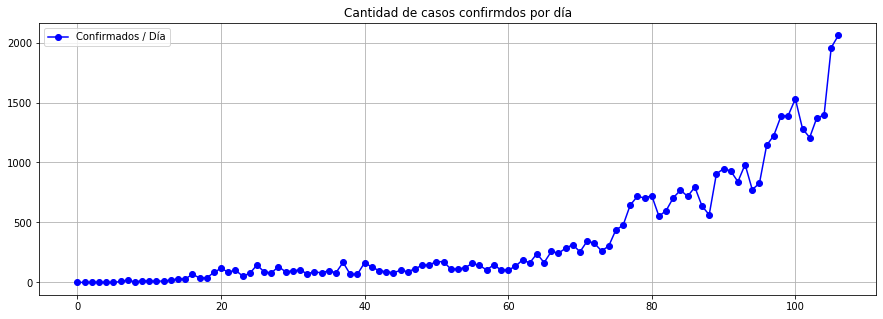

In [25]:
plt.plot(suma['nuevos_confirmados'],color='b',label='Confirmados / Día',marker='o')
plt.legend()
plt.title("Cantidad de casos confirmdos por día")
plt.grid()

Text(0.5, 1.0, 'Cantidad de fallecidos por día')

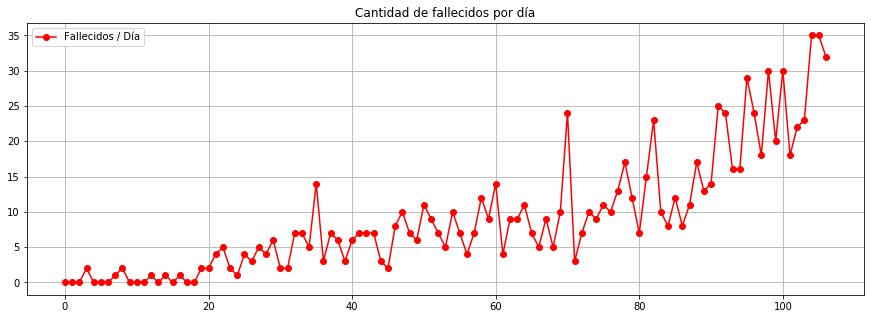

In [26]:
plt.plot(suma['nuevos_fallecidos'],color="r",label='Fallecidos / Día',marker='o')
plt.legend(loc=2)
plt.grid()
plt.title("Cantidad de fallecidos por día")

# Casos confirmados y fallecidos por provincia.

* En las siguientes dos graficas voy a representar los datos por provincia, de la siguiente manera:
  * En la primer grafica se puede ver la cantidad de casos confirmados en cada provincia, ordenadas desde la provinca que mas casos tiene a la que menos tiene. Para la representación agrupo y sumo los casos confirmados por provincia y  los ordeno de forma descendente.
  * Ya habiendo agrupado,sumado y ordenado los datos uso matplotlib para hacer el grafico de barras, donde se ven en el eje X las provincias y en el eje Y la cantidad de casos. Se representa con barras azules.
    * En la gráfica se puede observar claramente como CABA en primer lugar y Buenos Aires en segundo lugar tienen entre las dos la gran mayoria de los casos confirmados
  * El segundo grafico representa los fallecidos por cada provincia. Realizo en mismo procedimiento que en el grafico anterior, solo que, en vez de utilizar la columna de casos confirmados, utilizo la columna de fallecidos. Utilizo matplotlib para realizar la grafica de barras, en el eje X se ubican las provincias y en el eje Y la cantidad. Se representa con barras rojas.
    * En esta grafica se puede ver que Buenos Aires y CABA tienen la gran mayoría de fallecidos, pero a diferencia de los casos confirmados, Buenos Aires aparece en primer lugar a pesar de tener menos casos confirmados que CABA, la cual aparece en segundo lugar.

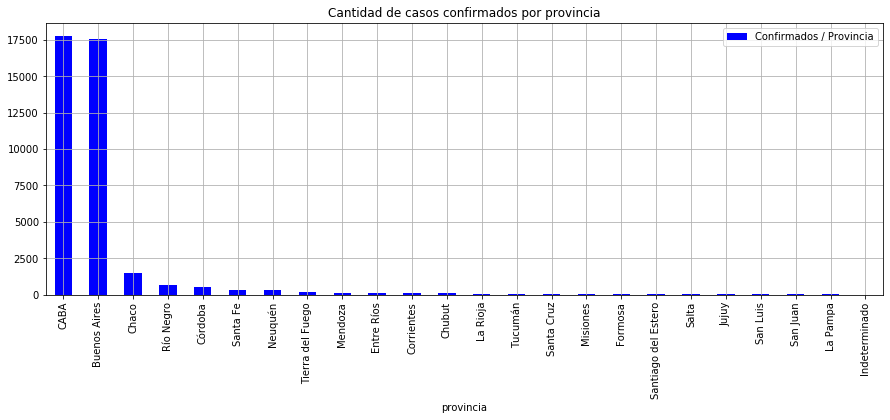

In [27]:
df_covid.groupby("provincia")["nuevos_confirmados"].sum().sort_values(ascending=False).plot(kind="bar",label="Confirmados / Provincia",color="blue")
plt.legend()
plt.title("Cantidad de casos confirmados por provincia")
plt.grid()

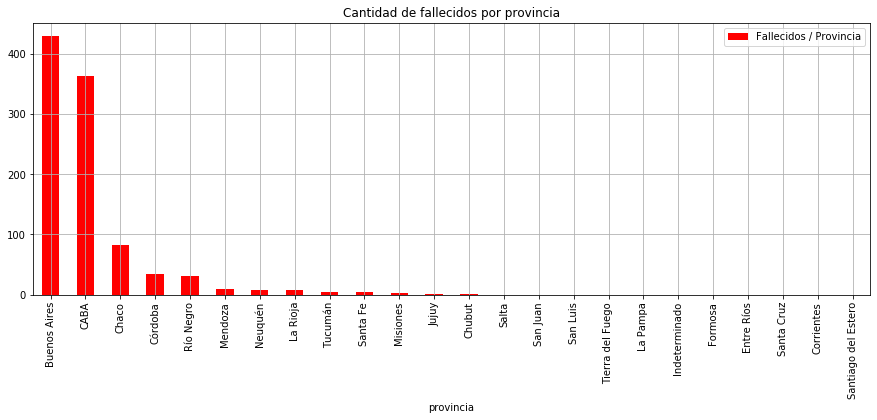

In [28]:
df_covid.groupby("provincia")["nuevos_fallecidos"].sum().sort_values(ascending=False).plot(kind="bar",label='Fallecidos / Provincia',color="r")
plt.legend()
plt.title("Cantidad de fallecidos por provincia")
plt.grid()

# Representación de curvas: Casos confirmados | Recuperados | Fallecidos.

* En la primera línea corrijo un error de carga en la cantidad de recuperados totales al día 22/05 correspondiente al día 79 desde el primer caso. Reemplazo el valor 2 por 3063 recuperados totales.
* En la siguiente linea grafíco las curvas de casos confirmados, recuperados, y fallecidos en 3 gráficas distintas.
* Las 3 gráficas tienen como eje X los días, en el eje Y las cantidades totales.
* Realizo las gráficas utilizando la libreria matplotlib. 

In [29]:
df_covid['total_recuperados'] = df_covid['total_recuperados'].replace(2.0, 3063.0)

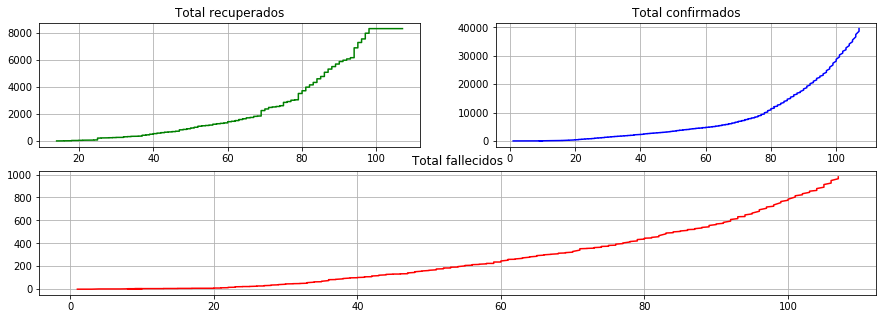

In [30]:
ax1 = plt.subplot(221)           
ax1.plot(df_covid['dia_inicio'], df_covid['total_recuperados'], color='green' )
ax1.grid()
ax1.set_title('Total recuperados')

ax2 = plt.subplot(212) 
ax2.plot(df_covid['dia_inicio'],df_covid['total_fallecidos'], color='red')
ax2.grid()
ax2.set_title('Total fallecidos')

ax3 = plt.subplot(222)           
ax3.plot(df_covid['dia_inicio'], df_covid['total_confirmados'], color='blue')
ax3.grid()
ax3.set_title('Total confirmados')


plt.show()



# Testeos

* La siguiente gráfica representa la cantidad de testeados, en color rojo, y la cantidad de test que dieron negativo a COVID19, en color azul.
* Se ve como, la linea azul, que representa la cantidad de test que dieron negativo se separa de la linea roja. La distancia que separa a la linea roja de la azul representa, en su gran mayoria, a los test que dieron positivo y en menor medida los test que resultaron fallidos.
* Realizo la grafica utilizando la libreria seaborn.

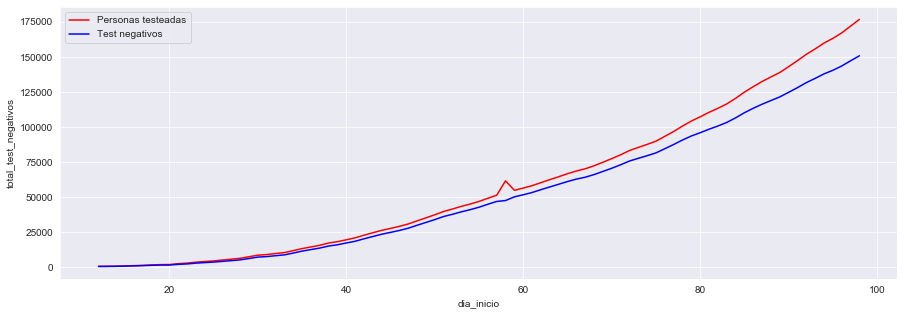

In [31]:
sns.set_style("darkgrid")
g=sns.lineplot(y="total_test",x="dia_inicio", data = df_covid ,label="Personas testeadas",color="red")
g=sns.lineplot(y="total_test_negativos",x="dia_inicio", data = df_covid ,label="Test negativos",color="blue")

# Dataframe para el merge.

* Para realizar el merge voy a reducir df_covid a 3 columnas, utilizando la columna provincia, calculando fallecidos y confirmados, las cuales voy a necesitar posteriormente, para el cálculo de la tasa de contagios y mortalidad.
* Para crear la columna de fallecidos, agrupo por provincia en df_covid y luego sumo la columa nuevos_fallecidos.Para la columna confirmados realizo el mismo procedimiento, a diferencia que en este caso sumo nuevos_confirmados.
* La columna provincia resulta del groupby de las columnas anteriores. Reemplazo CABA y Buenos Aires por Ciudad Autonoma de buenos Aires y Provincia de Buenos Aires respectivamente, de tal forma que coincidan los nombres de la provincias con el dataframe df_censo.
* Por último elimino la fila que se encuentra en la posición 7 ya que no representa ninguna provincia, sino, datos Indeterminados.

In [32]:
df_covid = df_covid.groupby(['provincia'])['nuevos_fallecidos','nuevos_confirmados'].sum().reset_index().rename(columns={'nuevos_fallecidos':'fallecidos','nuevos_confirmados':'confirmados'})

In [33]:
df_covid=df_covid.replace(['CABA','Buenos Aires'],['Ciudad Autónoma de Buenos Aires','Provincia de Buenos Aires'])

In [34]:
df_covid = df_covid.drop(7,axis=0)

In [35]:
df_covid

,provincia,fallecidos,confirmados
0,Provincia de Buenos Aires,430,17570.0
1,Ciudad Autónoma de Buenos Aires,363,17788.0
2,Chaco,83,1506.0
3,Chubut,1,85.0
4,Corrientes,0,113.0
5,Córdoba,34,532.0
6,Entre Ríos,0,115.0
8,Indeterminado,0,0.0
9,Jujuy,1,13.0
10,La Pampa,0,6.0


# Merge df_covid y df_censo

* Creo el dataframe data_resume para posteriormente utilizarlo en el cálculo de las tasas de contagio y mortalidad. 
* Surge de la union de df_censo y df_covid, usando como índice la columna provincia, ya que en los dos dataframe se llaman igual y compartes practicamente todos los datos, a excepción de Formosa, Catamarca y Total del pais, que estan en df_censo y no en df_covid. 
* Reemplazo los valores nulos por 0 y muestro el dataframe para corroborar la carga y verificar los datos.
* Por último elimino la fila Total pais, ya que no voy a utilizarla.

In [36]:
data_resume = pd.merge(left = df_censo , right = df_covid, how ="left", left_on= 'provincia' , right_on = 'provincia')

In [37]:
data_resume = data_resume.fillna(0)
data_resume

,provincia,poblaciónCenso 2010,fallecidos,confirmados
0,Provincia de Buenos Aires,15625083,430.0,17570.0
1,Córdoba,3308876,34.0,532.0
2,Santa Fe,3194537,4.0,312.0
3,Ciudad Autónoma de Buenos Aires,2890151,363.0,17788.0
4,Mendoza,1738929,10.0,122.0
5,Tucumán,1448188,5.0,58.0
6,Entre Ríos,1235994,0.0,115.0
7,Salta,1214441,0.0,21.0
8,Misiones,1101593,2.0,38.0
9,Chaco,1055259,83.0,1506.0


In [38]:
data_resume=data_resume.drop([24],axis=0)

In [39]:
data_resume['confirmados']=data_resume['confirmados'].astype(int)
data_resume['fallecidos']=data_resume['fallecidos'].astype(int)

# Tasa de contagiados y fallecidos cada 100K habitantes

* Voy a agregar dos columnas a data_resume, para mostrar, en la primera, la tasa de contagios cada cien mil habitantes y en la segunda, la tasa de fallecidos cada cien mil habitantes por cada provincia. Luego muestro el dataset para corroborar que las columnas se hayan agregado correctamente.

In [40]:
data_resume["contagios_cada_100.000"]=(data_resume['confirmados']/data_resume['poblaciónCenso 2010'])*100000

In [41]:
data_resume["mortalidad_cada_100.000"]=(data_resume['fallecidos']/data_resume['poblaciónCenso 2010'])*100000

In [42]:
data_resume

,provincia,poblaciónCenso 2010,fallecidos,confirmados,contagios_cada_100.000,mortalidad_cada_100.000
0,Provincia de Buenos Aires,15625083,430,17570,112.447403,2.751985
1,Córdoba,3308876,34,532,16.077967,1.027539
2,Santa Fe,3194537,4,312,9.766674,0.125214
3,Ciudad Autónoma de Buenos Aires,2890151,363,17788,615.469572,12.559897
4,Mendoza,1738929,10,122,7.015813,0.575067
5,Tucumán,1448188,5,58,4.005005,0.345259
6,Entre Ríos,1235994,0,115,9.304252,0.000000
7,Salta,1214441,0,21,1.729191,0.000000
8,Misiones,1101593,2,38,3.449550,0.181555
9,Chaco,1055259,83,1506,142.713779,7.865368


# Representación gráficas de tasas de contagios y mortalidad por provincias.

* En la siguente línea grafíco la tasa de mortalidad y la tasa de contagiados cada cien mil habitantes por cada provincia, ambas gráficas se encuentran en la misma línea.
* En ambas gráficas se representa en el eje X las provincias, ordenadas en forma descendente por tasa de mortalidad y tasa de contagios respectivamente, y en el eje Y las cantidades.
* Utilizo la libreria matplotlib para la confección de las gráficas.
* El primer gráfico representa la tasa de mortalidad cada cien mil habitantes en cada provincia. Claramente la tasa de mortalidad más alta la tiene la Ciudad Autónoma de Buenos Aires. Vemos como la provincia de Buenos Aires pasa a estar en cuarto lugar a pesar de ser la provincia que más fallecidos tiene, antes aparecen Chaco y Rio Negro, las cuales tienen menor cantidad de fallecidos pero en relacion a la cantidad de habitantes la tasa de mortalidad es más alta que en la provincia de Buenos Aires.
* El segundo gráfico representa la tasa de contagios cada cien mil habitantes en cada provincia. Se observa en primer lugar a la Ciudad Autónoma de Buenos Aires, despúes se encuentra la provincia de Chaco, Tierra del Fuego(la cual a pesar de tener la tercer tasa de contagio más alta, no tiene ningún fallecido), Buenos Aires y en quinto lugar la provincia de Rio Negro. 


Text(0.5, 1.0, 'Contagios por provincia cada 100K habitantes')

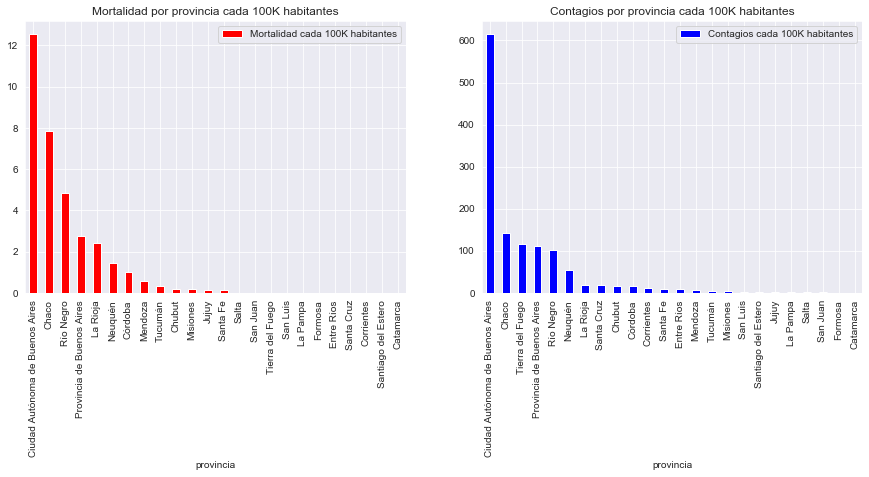

In [43]:
plt.subplot(1,2,1)
data_resume.groupby("provincia")['mortalidad_cada_100.000'].sum().sort_values(ascending=False).plot(kind="bar",label="Mortalidad cada 100K habitantes",color="r")
plt.legend()
plt.xticks(rotation=90)
plt.title('Mortalidad por provincia cada 100K habitantes')
plt.subplot(1,2,2)
data_resume.groupby('provincia')['contagios_cada_100.000'].sum().sort_values(ascending=False).plot(kind='bar',label='Contagios cada 100K habitantes',color='b')
plt.legend()
plt.xticks(rotation=90)
plt.title('Contagios por provincia cada 100K habitantes')

In [44]:
df_covid.to_excel('COVID2.xlsx', sheet_name='COVID2')
df_censo.to_excel('CENSO.xlsx', sheet_name='CENSO')